In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import sklearn
import pandas as pd
import pickle
import seaborn as sns
from scipy import stats

# TODO : Importation des librairies
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_diabetes

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier, SGDRegressor, PassiveAggressiveRegressor, LinearRegression, Lasso, ElasticNet, Ridge, HuberRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, DBSCAN, MiniBatchKMeans, MeanShift, OPTICS, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import sklearn
import pandas as pd
import pickle

#metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
import tensorflow as tf


# Loader le dataset

In [5]:
df = pd.read_csv('/fraud-workspace/Datasets_sauvegardes/dataset-fraude-detection-fusionner-sans-nan-feature-ingeniering-10-08-2023.csv')

In [6]:
pd.set_option('display.max_columns', None)
df.head(5)

,isFraud,TransactionAmt,ProductCD,card1,card3,card4,card5,card6,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,D1,D2,D3,D4,D10,D11,D15,M4,M6,V3,V4,V5,V6,V10,V11,V12,V13,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V66,V67,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V89,V90,V91,V92,V93,V94,V96,V97,V98,V99,V100,V101,V102,V103,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V129,V131,V281,V282,V283,V284,V285,V287,V288,V289,V290,V291,V292,V293,V300,V301,V302,V303,V304,V309,V310,V312,V313,V314,V315,Year,Month,NbTran_by_client,SunMontTran_by_client,MoyTran_by_client,MaxMontTran_by_client,MinMontTran_by_client,DiffTran_by_client
0,0,68.5,4,13926,150,1,142,1,87,16,1,1,0,0,0,1,0,0,1,0,2,0,1,14,0,13,0,13,13,0,2,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1970,1,1,68.50,68.50,68.50,68.50,0.00
1,0,29.0,4,2755,150,2,102,1,87,16,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1970,1,131,56922.92,434.53,4592.02,25.95,4566.07
2,0,59.0,4,4663,150,3,166,2,87,35,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,315,315,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1970,1,198,19564.40,98.81,664.00,12.50,651.50
3,0,50.0,4,18132,150,2,117,2,87,53,2,5,0,0,0,4,0,0,1,0,1,0,25,112,112,0,94,84,0,111,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,48,28,0,10,4,1,38,24,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,135.0,0,0,0,0,10,4,0,0,1,1,1,1,0,0,0,0,0,0.0,354.0,135.0,0.0,0.0,0.0,1970,1,6,490.00,81.67,120.00,50.00,70.00
4,0,50.0,1,4497,150,2,102,1,87,16,1,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1970,1,3,130.00,43.33,50.00,30.00,20.00


In [7]:
df_copie = df.copy()

In [8]:
df_copie.shape

(590540, 174)

In [9]:
# Separer X et y
y = df_copie['isFraud']
X = df_copie.drop(['isFraud'], axis=1)

In [10]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.20, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((472432, 173), (118108, 173), (472432,), (118108,))

In [11]:
#over_sampling sur les donnees d'entrainement

from imblearn.over_sampling import SMOTE
sm = SMOTE()

X_train, y_train = sm.fit_resample(X_train, y_train)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((911804, 173), (118108, 173), (911804,), (118108,))

In [12]:
import category_encoders as ce
from autosklearn.classification import AutoSklearnClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from autosklearn.metrics import (accuracy,
                                 f1,
                                 roc_auc,
                                 precision,
                                 average_precision,
                                 recall,
                                 log_loss)

In [13]:
skf = StratifiedKFold(n_splits=5)

In [14]:
autosklearn_clf = AutoSklearnClassifier(time_left_for_this_task=600,
                            max_models_on_disc=5,
                            memory_limit = 102400,
                            resampling_strategy=skf,
                            ensemble_size = 3,
                            metric = average_precision,
                            scoring_functions=[roc_auc, average_precision, accuracy, f1, precision, recall, log_loss])

/tmp/ipykernel_126611/886352494.py:1: DeprecationWarning: `ensemble_size` has been deprecated, please use `ensemble_kwargs = {'ensemble_size': 3}`. Inserting `ensemble_size` into `ensemble_kwargs` for now. `ensemble_size` will be removed in auto-sklearn 0.16.
  autosklearn_clf = AutoSklearnClassifier(time_left_for_this_task=600,


In [15]:
autosklearn_clf.fit(X = X_train, y = y_train)
#predictions = autosklearn_clf.predict(X_test)

[WARNING] [2023-08-11 08:15:10,343:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-08-11 08:15:29,444:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-08-11 08:15:38,253:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-08-11 08:16:40,095:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-08-11 08:17:41,928:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-08-11 08:18:43,731:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-08-11 08:19:03,791:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-08-11 08:19:14,413:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-08-11 08:20:16,287:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-08-11 08:21:

AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      ensemble_kwargs={'ensemble_size': 3}, ensemble_size=3,
                      max_models_on_disc=5, memory_limit=102400,
                      metric=average_precision, per_run_time_limit=60,
                      resampling_strategy=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                      scoring_functions=[roc_auc, average_precision, accuracy,
                                         f1, precision, recall, log_loss],
                      time_left_for_this_task=600)

In [25]:
print(autosklearn_clf.sprint_statistics())

auto-sklearn results:
  Dataset name: f22d21f7-381e-11ee-ae93-76624cefbd7c
  Metric: average_precision
  Number of target algorithm runs: 13
  Number of successful target algorithm runs: 0
  Number of crashed target algorithm runs: 4
  Number of target algorithms that exceeded the time limit: 8
  Number of target algorithms that exceeded the memory limit: 1



In [40]:
# Obtenir les modèles avec leurs poids associés
models_with_weights = autosklearn_clf.get_models_with_weights()
models_with_weights

[(1.0,
  MyDummyClassifier(config=1,
                    feat_type={'C1': 'numerical', 'C10': 'numerical',
                               'C11': 'numerical', 'C12': 'numerical',
                               'C13': 'numerical', 'C2': 'numerical',
                               'C3': 'numerical', 'C4': 'numerical',
                               'C5': 'numerical', 'C6': 'numerical',
                               'C7': 'numerical', 'C8': 'numerical',
                               'C9': 'numerical', 'D1': 'numerical',
                               'D10': 'numerical', 'D11': 'numerical',
                               'D15': 'numerical', 'D2': 'numerical'...
                                                                 'D2': 'numerical',
                                                                 'D3': 'numerical',
                                                                 'D4': 'numerical',
                                                                 'DiffTran_by_cli

In [41]:
# Afficher les informations sur les modèles et leurs poids
for idx, (model, weight) in enumerate(models_with_weights, start=1):
    print(f"Modèle {idx}:")
    print(f"Nom du modèle: {model}")
    print(f"Poids: {weight}\n")

Modèle 1:
Nom du modèle: 1.0
Poids: MyDummyClassifier(config=1,
                  feat_type={'C1': 'numerical', 'C10': 'numerical',
                             'C11': 'numerical', 'C12': 'numerical',
                             'C13': 'numerical', 'C2': 'numerical',
                             'C3': 'numerical', 'C4': 'numerical',
                             'C5': 'numerical', 'C6': 'numerical',
                             'C7': 'numerical', 'C8': 'numerical',
                             'C9': 'numerical', 'D1': 'numerical',
                             'D10': 'numerical', 'D11': 'numerical',
                             'D15': 'numerical', 'D2': 'numerical'...
                                                               'D2': 'numerical',
                                                               'D3': 'numerical',
                                                               'D4': 'numerical',
                                                               'DiffTran_by_cl

In [17]:
# Sauvegarder notre model
filename = '../Models_sauvegardes/model_Auto_sklearn_cls_10_08_2023.sav'
pickle.dump(autosklearn_clf, open(filename, 'wb'))

In [31]:
# Appeler la méthode refit() pour ajuster le modèle sur l'ensemble complet de données d'entraînement
autosklearn_clf.refit(X_train.copy(), y_train.copy())

AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      ensemble_kwargs={'ensemble_size': 3}, ensemble_size=3,
                      max_models_on_disc=5, memory_limit=102400,
                      metric=average_precision, per_run_time_limit=60,
                      resampling_strategy=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                      scoring_functions=[roc_auc, average_precision, accuracy,
                                         f1, precision, recall, log_loss],
                      time_left_for_this_task=600)

In [42]:
'''
# Afficher les informations sur le meilleur modèle trouvé par Auto-Sklearn
print("Meilleur modèle Auto-Sklearn:")
print(autosklearn_clf.show_models())
'''

'\n# Afficher les informations sur le meilleur modèle trouvé par Auto-Sklearn\nprint("Meilleur modèle Auto-Sklearn:")\nprint(autosklearn_clf.show_models())\n'

In [32]:
y_pred_autosklearn = autosklearn_clf.predict(X_test)
y_pred_autosklearn

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
print('Precision: %.3f' % precision_score(y_test, y_pred_autosklearn))
print('Recall: %.3f' % recall_score(y_test, y_pred_autosklearn))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_autosklearn))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_autosklearn))
from sklearn import metrics
print('AUC = %.2f' % roc_auc_score(y_test, y_pred_autosklearn))  #1

Precision: 0.000
Recall: 0.000
Accuracy: 0.965
F1 Score: 0.000
AUC = 0.50


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
# Définition d'un seuil de classification (par exemple 60%)
threshold = 0.6

# Labels prédits pour un seuil donné
label_pred_threshold = (y_pred_autosklearn > threshold).astype(int)
# Calcul de la matrice de confusion pour un seuil donné
matrix_threshold = confusion_matrix(
    y_true=y_test, y_pred=label_pred_threshold
)

print(matrix_threshold)

[[113975      0]
 [  4133      0]]


In [35]:
# Extract the true positive, true negative, false positive, and false negative values from the confusion matrix
tp, fp, fn, tn = matrix_threshold.ravel()
 
# Print the true positive, true negative, false positive, and false negative values
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)

True Positive (TP):  113975
True Negative (TN):  0
False Positive (FP):  0
False Negative (FN):  4133


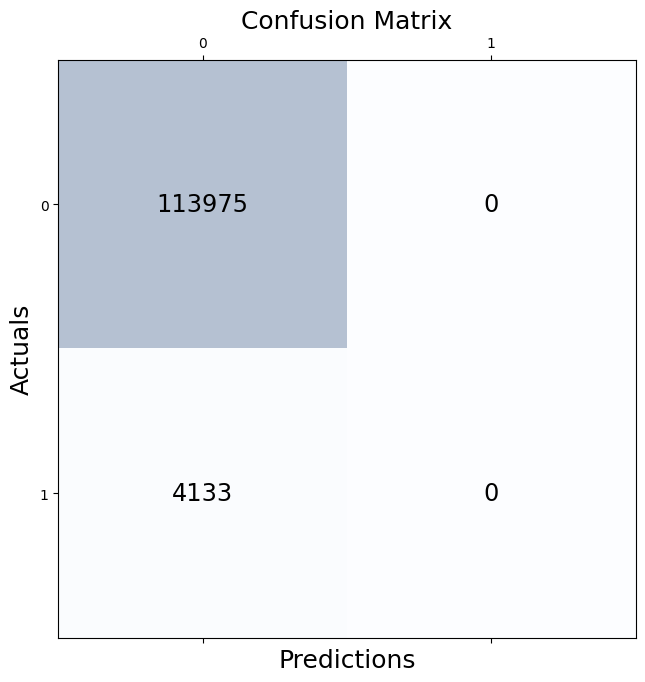

In [36]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_autosklearn)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()